# Classification

## Question 1

### 1.1 cas separable et lineaire

Le trait plein est la droite (hyperplan) separatrice.
les 2 traits pointillées représentent les deux droites de vaste marge.
En augmentant progressivement le paramètre de régularisation C, de 0.1 à 10000, rien ne change (ni la droite séparatrice ni les droites de vaste marge), cela est du au fait que l'algorithme de minimisation (SGD) trouvent des pramètres de violations de 0 pour chaque xi (cas séparable) donc comme C est multiplié par ces paramètres de violation, il n'a pas d'influence. On obtient 100% de classification.

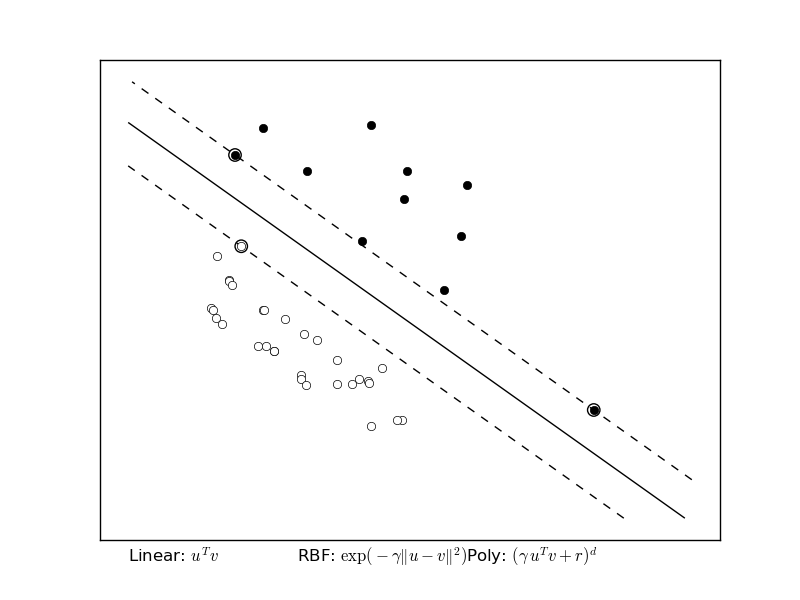

In [1]:
from IPython.display import Image
Image(filename='images/1_1_C0.1_h.png')

### 1.2 cas separable et non-linéaire gaussien 

En prenant un gamma de 0.1 et un C de 10, on obtient 100% de precision, en revanche, au vu de la complexité de la frontière, on constate qu'il y a surapprentissage (le .py calcule un score de training et non un score de validation, ce derner serait mauvais ici). 

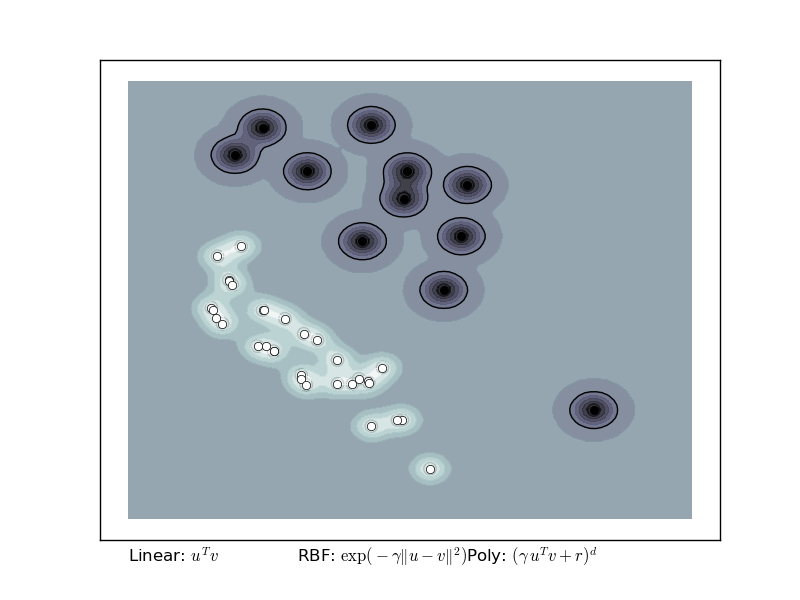

In [2]:
Image(filename='images/1_2_C10_gamma0.1.png')

Palier à un  problème de surapprentissage, revient à augmenter la paramètre de régularisation C : faisons le passer à 1000 mais cela ne change rien :

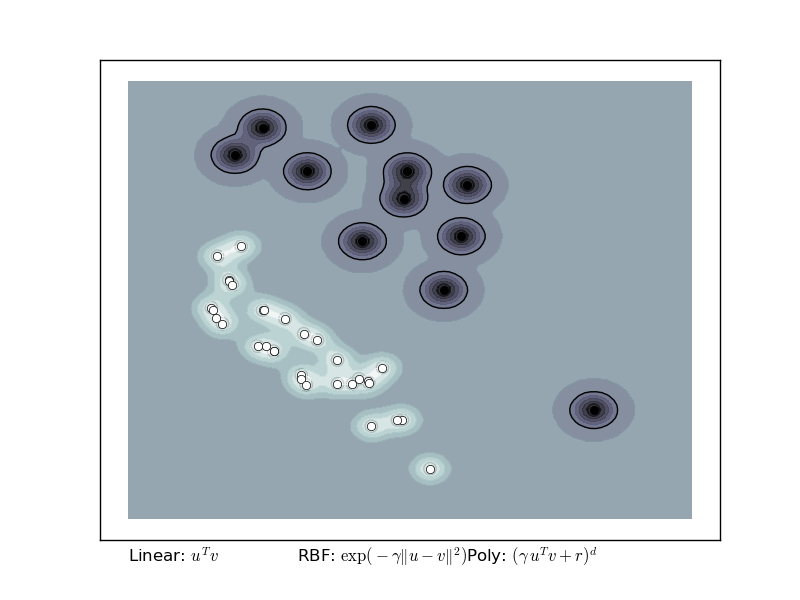

In [3]:
Image(filename='images/1_2_C1000_gamma0.1.png')

Au final, on arrive à remédier à ce surapprentissage en faisant passer gamma de 0.1 à 0.001.
conclusion : le paramètre de régularisation seul ne suffit pas à éviter le surapprentissage :

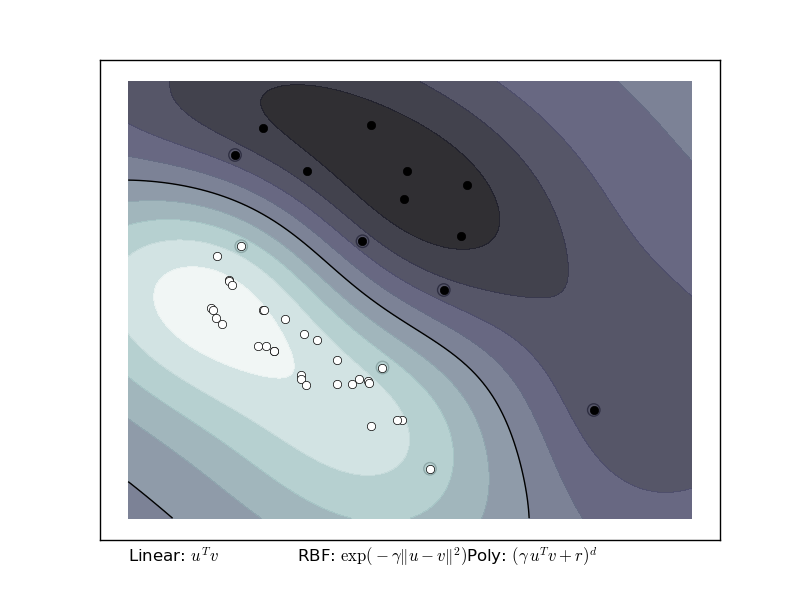

In [4]:
Image(filename='images/1_2_C10_gamma0.001.png')

## Question 2

Estimation d'un classifieur linéaire sur des données unimodales :

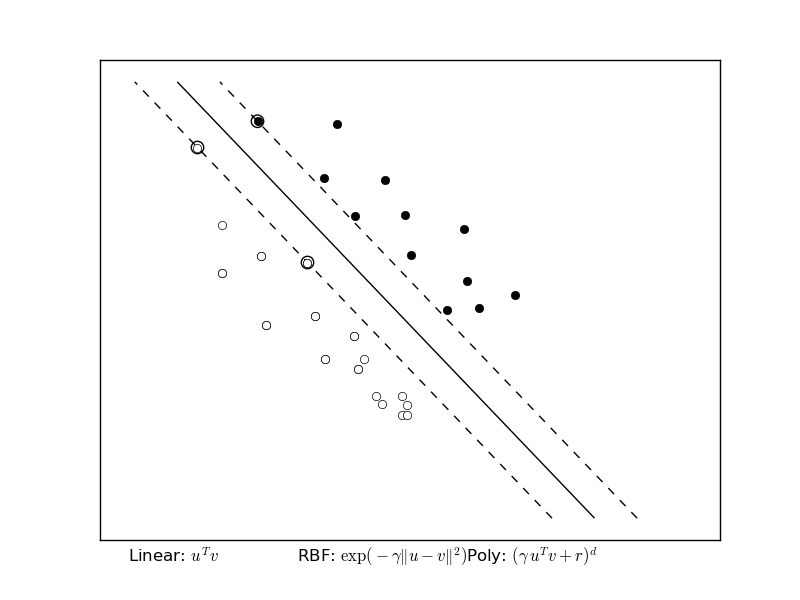

In [5]:
Image(filename='images/2_C0.1_h.png')

Si on ajoute un point dans son camp, hors de la marge, rien ne change (qu'on soit dans le cas linéaire ou gaussien) car seul les points sur la marge participe à la définition du classieur (son alpha est nul).

Si on rajoute un point dans la marge, svm redéfinit ses marges et le point devient cette fois un point support (alpha non nul)

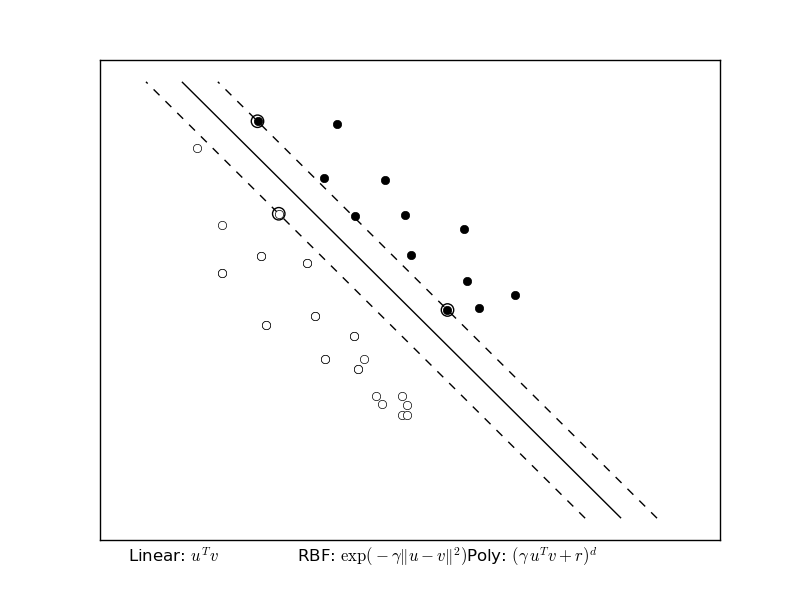

In [6]:
Image(filename='images/2_C0.1_h_ajout_dans_la_marge.png')

Idem si on ajoute un point dans le camp adverse : SVM redefinit ces marges, mais cette fois le cas linéaire ne peut séparer les points (la précision passe de 100% à 97%). Par contre le cas gaussien, est bien adapté pour cette situation (on retrouve un précision de 100%)

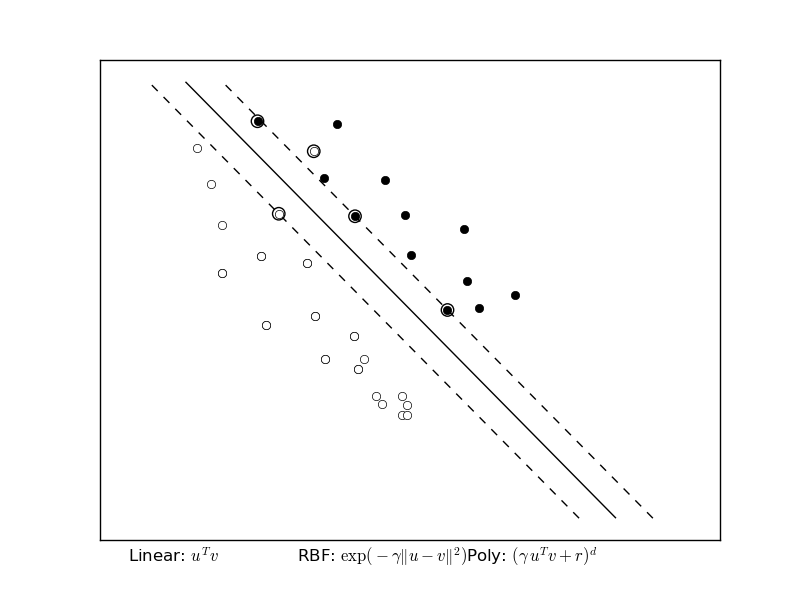

In [7]:
Image(filename='images/2_C0.1_h_ajout_camp_adverse.png')

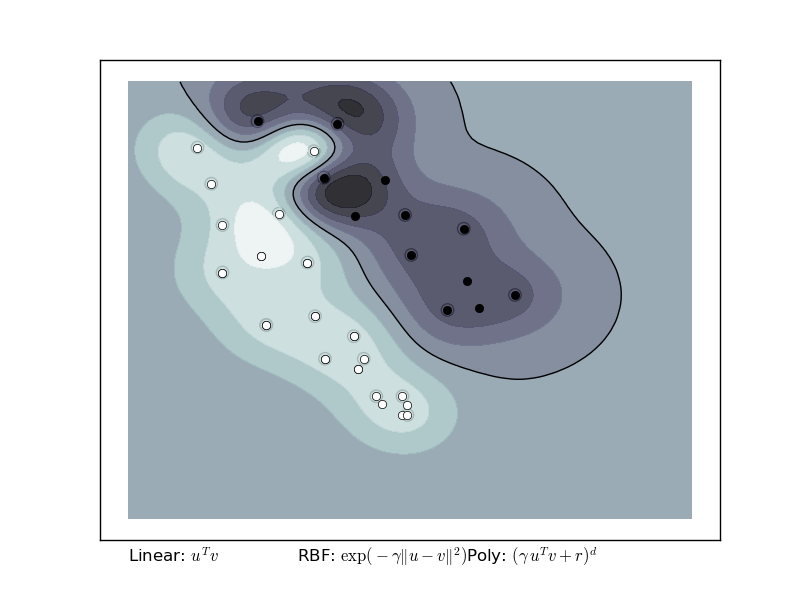

In [8]:
Image(filename='images/2_C0.1_gamma0.01_ajout_camp_adverse.png')

## Question 3

Génération d'un jeu déséquilibré

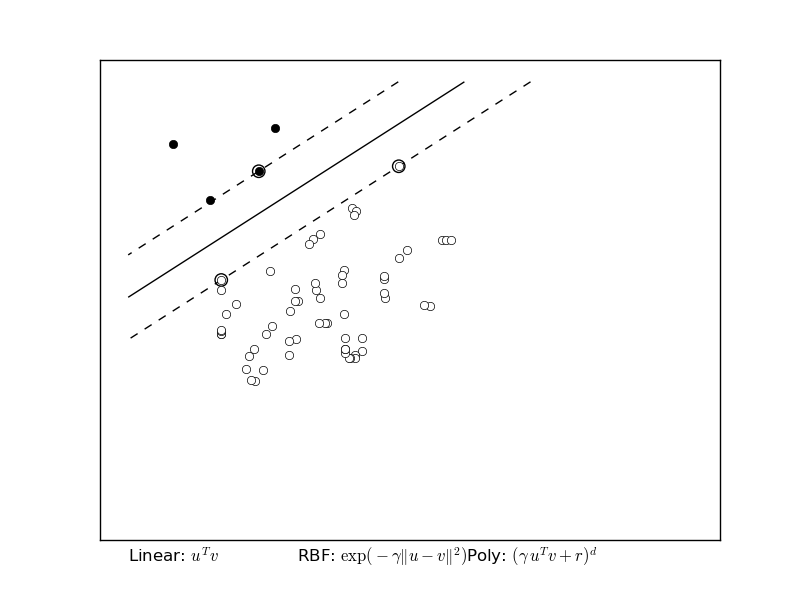

In [9]:
Image(filename='images/3_C0.01_h.png')

Diminution de C à 0.01

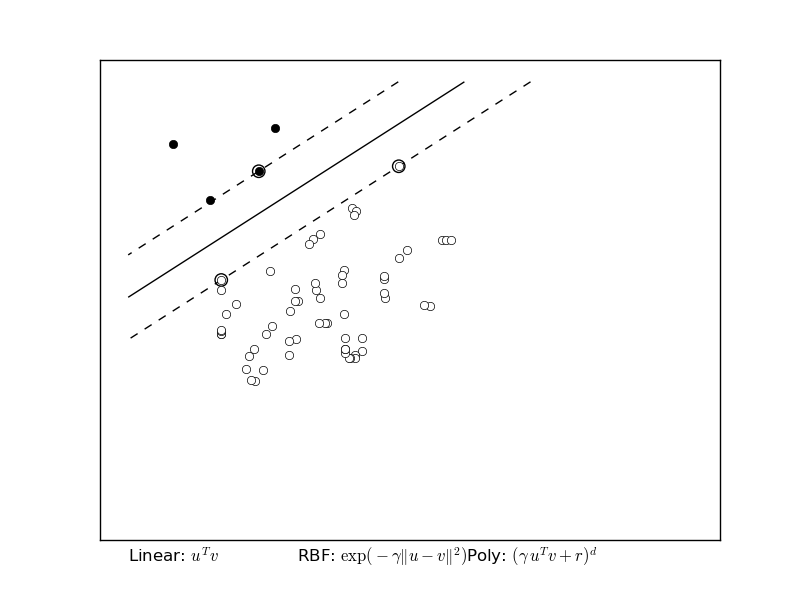

In [10]:
Image(filename='images/3_C0.01_h.png')

Diminution de C à 0.001

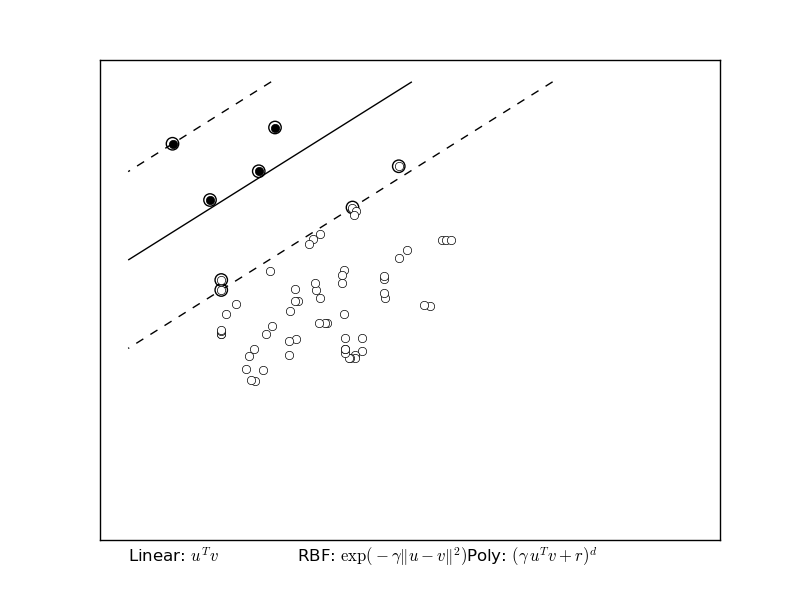

In [11]:
Image(filename='images/3_C0.001_h.png')

Diminution de C à 0.0006

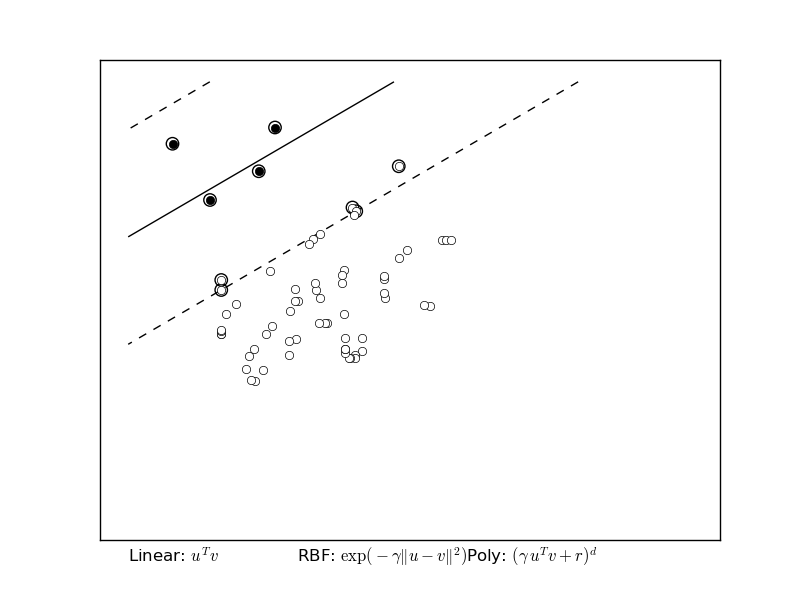

In [12]:
Image(filename='images/3_C0.0006_h.png')

On voit que dans un cas où une classe est sous représentée, le classifieur SVM linéaire sépare mal les données pour un C faible (0.0006), en particulier les données de la classe sous représentée. 

En effet, dans un tel cas, les données sous représentés ont peu d'impact sur le terme d'attache, ce terme ayant déjà une faible impact avec un C faible : les données sous représentées ont donc doublement peu d'impact. Prendre un C de 0.1 donne déjà plus d'importance au terme d'attache, et donc une meilleure classification.
En mettant le paramètre weight_class à 'balanced' qui donne une importance inversement proportionnelle au nombre de données pour chaque classe, on voit que le classifieur sépare bien la classe minoritaire, tout en gardant un C de 0.0006! :

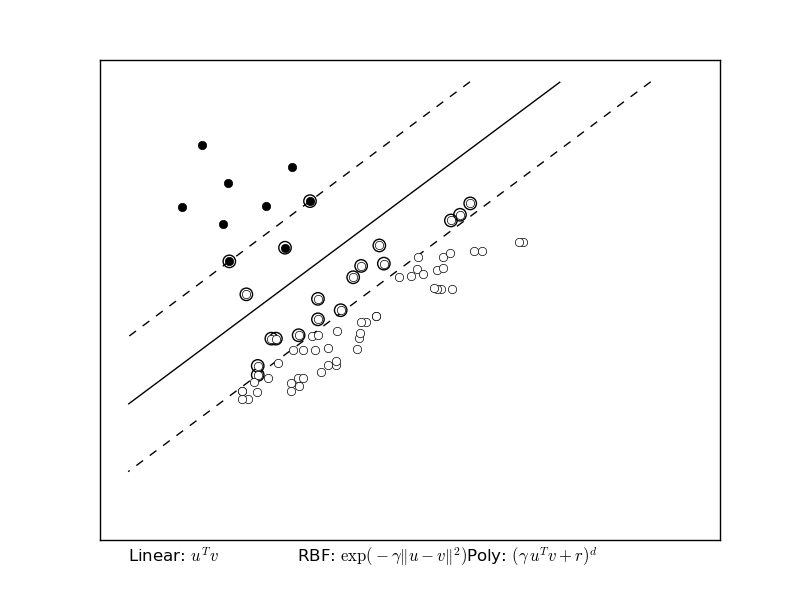

In [13]:
Image(filename='images/3_C0.0006_h_balanced.png')

## Question 4

### Chargement du dataset iris

In [14]:
%matplotlib notebook
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn import grid_search
from sklearn.cross_validation import StratifiedShuffleSplit
import pandas as pd
from utils import (frontiere,plot_2d)
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize



np.random.seed(seed=42)

# for saving files
saving_activated = False

In [34]:
# selection des deux premières classes restreintes aux deux premiers features
iris_dataset = load_iris()
X = np.asarray(pd.DataFrame(iris_dataset.data))
y = (iris_dataset.target)
X = StandardScaler().fit_transform(X) # data reduction
classes = list(set(y))
select = np.squeeze(np.argwhere(y>=1))
yselect = y[select]
Xselect = X[select,:]
Xselect = Xselect[:,:2] # select two first features





### Classifieur SVM linéaire

In [35]:
clf = SVC(C=1,kernel='linear')
clf.fit(Xselect,yselect)
print "precision moyenne : ",clf.score(Xselect,yselect).mean()

precision moyenne :  0.73


<IPython.core.display.Javascript object>


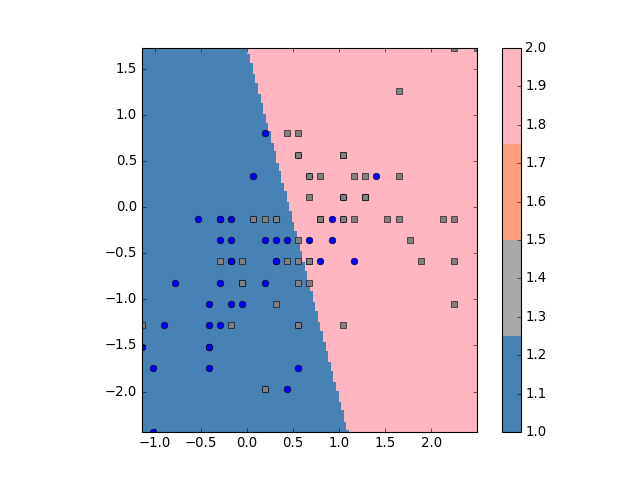

In [36]:
resolution_param = 200
fig2 = plt.figure()
plot_2d(Xselect, yselect)
frontiere(lambda xx: clf.predict(xx.reshape(1, -1)), Xselect,step=resolution_param)

## Question 5

### Paramètre de régularisation par cross-validation

*** linear SVM ***
regularization parameter list :  [  1.00000000e-05   1.00000000e-04   1.00000000e-03   1.00000000e-02
   1.00000000e-01   1.00000000e+00   1.00000000e+01   1.00000000e+02
   1.00000000e+03   1.00000000e+04   1.00000000e+05]
corresponding errors :  [ 0.46  0.46  0.46  0.46  0.3   0.28  0.32  0.32  0.34  0.34  0.36]
best regularization parameter :  1.0
Error test with best parameter regularization (C= 1.0 ) :  0.3


<IPython.core.display.Javascript object>


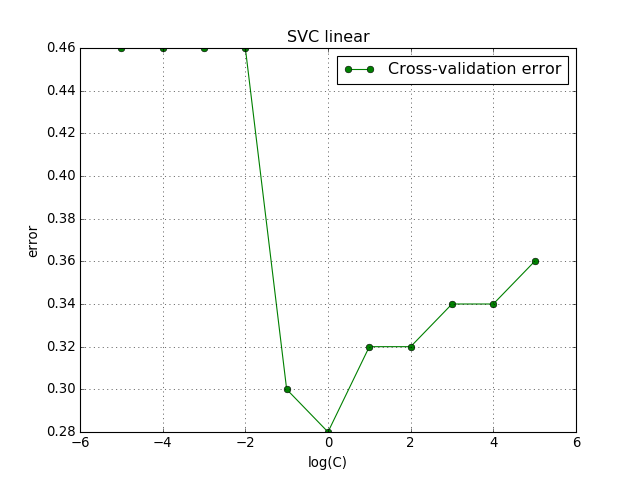

*** polynomial SVM ***
regularization parameter list :  [  1.00000000e-05   1.00000000e-04   1.00000000e-03   1.00000000e-02
   1.00000000e-01   1.00000000e+00   1.00000000e+01   1.00000000e+02
   1.00000000e+03   1.00000000e+04   1.00000000e+05]
corresponding errors :  [ 0.46  0.46  0.46  0.46  0.48  0.46  0.4   0.36  0.36  0.36  0.36]
best regularization parameter :  100.0
Error test with best parameter regularization (C= 100.0 ) :  0.38


<IPython.core.display.Javascript object>


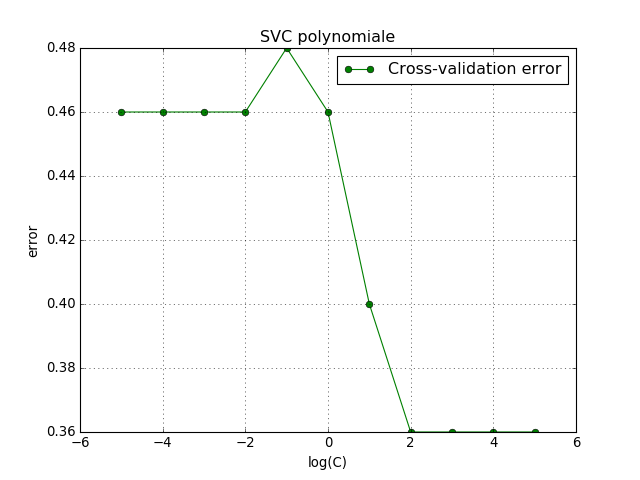

In [42]:
# on prend la moitié des données pour trouver le meilleur paramètre de regularisation par cross-validation,
# l'autre pour le test
perm = np.random.permutation(yselect.size)
valid = perm[:yselect.size/2]
test = perm[yselect.size/2:]
yvalid = yselect[valid]
Xvalid = Xselect[valid,:]
Xtest = Xselect[test,:]
ytest = yselect[test]

# liste des paramètres de régularisation à parcourir en cross validation
param_grid = {'C': np.logspace(-5, 5, 11)} # search from 10^-5 to 10^5

# svm lineaire
clf_svc_grid = grid_search.GridSearchCV(SVC(kernel='linear'), param_grid,cv=5)
clf_svc_grid.fit(Xvalid,yvalid)
C_best = clf_svc_grid.best_params_['C']
param_best = clf_svc_grid.best_params_['C']
scores = [x[1] for x in clf_svc_grid.grid_scores_]
errors = 1 - np.asarray(scores)
print "*** linear SVM ***"
print "regularization parameter list : ",clf_svc_grid.param_grid['C']
print "corresponding errors : ",errors
print "best regularization parameter : ",param_best
print "Error test with best parameter regularization (C=",param_best,") : ",1-clf_svc_grid.best_estimator_.score(Xtest,ytest) 
fig4 = plt.figure()
plt.grid()
plt.plot(np.log10(clf_svc_grid.param_grid['C']), errors, 'o-', color="g",
             label="Cross-validation error")
plt.legend(loc="best")
plt.xlabel('log(C)')
plt.ylabel('error')
plt.legend()
plt.title('SVC linear')
plt.show()


#svm polynomial
clf_svc_grid = grid_search.GridSearchCV(SVC(kernel='poly'), param_grid,cv=5)
clf_svc_grid.fit(Xvalid,yvalid)
C_best = clf_svc_grid.best_params_['C']
param_best = clf_svc_grid.best_params_['C']
scores = [x[1] for x in clf_svc_grid.grid_scores_]
errors = 1 - np.asarray(scores)
print "*** polynomial SVM ***"
print "regularization parameter list : ",clf_svc_grid.param_grid['C']
print "corresponding errors : ",errors
print "best regularization parameter : ",param_best
print "Error test with best parameter regularization (C=",param_best,") : ",1-clf_svc_grid.best_estimator_.score(Xtest,ytest) 
fig4 = plt.figure()
plt.grid()
plt.plot(np.log10(clf_svc_grid.param_grid['C']), errors, 'o-', color="g",
             label="Cross-validation error")
plt.legend(loc="best")
plt.xlabel('log(C)')
plt.ylabel('error')
plt.legend()
plt.title('SVC polynomiale')
plt.show()


## Question 6

### Paramètre gamma et paramètre de régularisation par cross-validation

The best parameters are {'C': 1.0, 'gamma': 0.25} with a score of 0.97


<IPython.core.display.Javascript object>


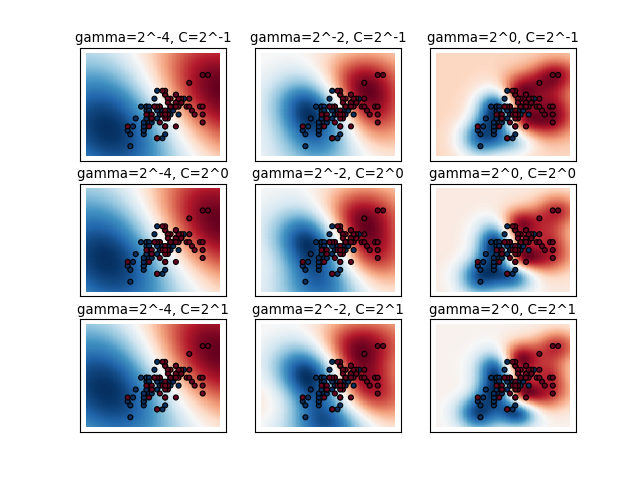

<IPython.core.display.Javascript object>


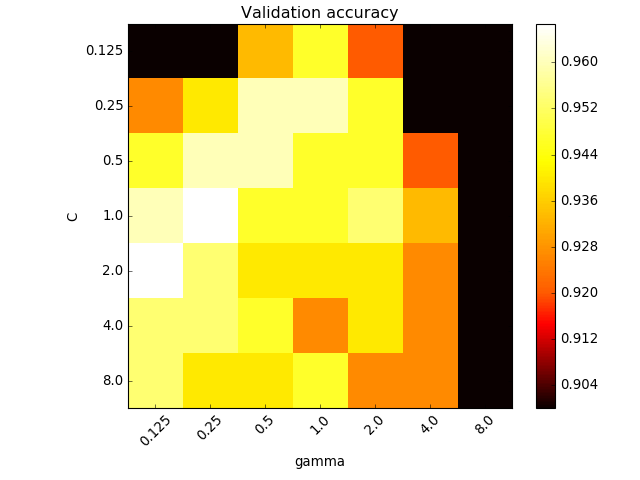

In [39]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# on fixe la plage de variations des hyperparamètres C et gamma
C_range = np.logspace(-3, 3, 7,base=2.0)
gamma_range = np.logspace(-3, 3, 7,base=2.0)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y, n_iter=5, test_size=0.2, random_state=42)
# instanciation d'un grid_search pour trouver le meilleur jeu d'hyperparamètres
grid = grid_search.GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

C_2d_range = np.logspace(-1,1,3,base=2)
gamma_2d_range = np.logspace(-4,0,3,base=2)
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(Xselect, yselect)
        classifiers.append((C, gamma, clf))

##############################################################################
# visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=2^%d, C=2^%d" % (np.log2(gamma), np.log2(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(Xselect[:, 0], Xselect[:, 1], c=yselect, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

# on récupère les scores pour chaque couple {C,gamma} d'hyperparamères calculés par grid_search
scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# on affiche la séparation pour chaque (C,gamma) et le score comme fonction de (C,gamma)

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.9, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

## Question 7

### Erreur de test en fonction du paramètre de regularisation

<IPython.core.display.Javascript object>


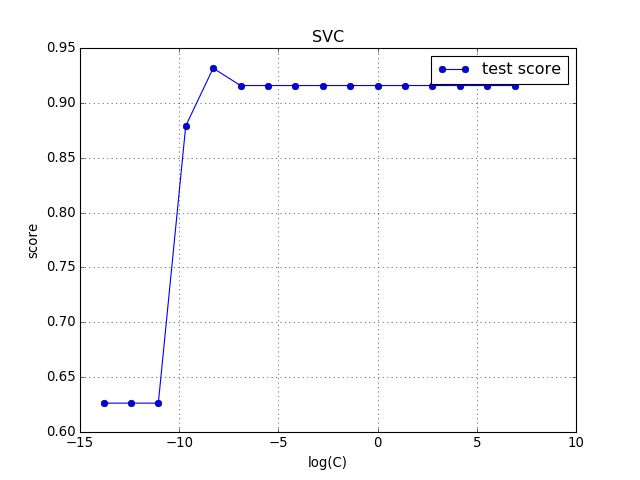

In [26]:
"""
=======================================================
Faces recognition example using SVMs and custom kernels
=======================================================

The dataset used in this example is a preprocessed excerpt 
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

import numpy as np
from time import time
import pylab as pl

from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn import grid_search

####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None, 
                              download_if_missing =True)

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
#X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
#X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:X.shape[0]/2], indices[X.shape[0]/2:]
X_train, X_test = X[train_idx,:], X[test_idx,:]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx,:,:,:], images[test_idx,:,:,:]

####################################################################
params_C = np.logspace(-6,3,16) # C from 10^-6 to 10^3
scores_test = []
for C in params_C:
    clf_svc = SVC(kernel='linear',C=C)
    clf_svc.fit(X_train,y_train)
    scores_test.append(clf_svc.score(X_test,y_test))
fig = pl.figure()
pl.grid()
pl.plot(np.log(params_C), scores_test, 'o-', color="b",label="test score")
pl.legend(loc="best")
pl.xlabel('log(C)')
pl.ylabel('score')
pl.legend()
pl.title('SVC')
pl.show()  



## Question 8 

On centre et réduit les données afin de ne pas pénaliser les dimensions qui ont une plage de valeur faible. On soustrait la moyenne et on divise par l'ecart-type selon chaque dimension.

## Question 9

### Erreur de training et de test en fonction du nombre d'éléments


* Fitting the classifier to the training set with  20  elements
*** best regularization parameter :  0.000251188643151

* Fitting the classifier to the training set with  38  elements
*** best regularization parameter :  0.000251188643151

* Fitting the classifier to the training set with  57  elements
*** best regularization parameter :  0.000251188643151

* Fitting the classifier to the training set with  76  elements
*** best regularization parameter :  0.001

* Fitting the classifier to the training set with  95  elements
*** best regularization parameter :  0.000251188643151

* Fitting the classifier to the training set with  114  elements
*** best regularization parameter :  0.000251188643151

* Fitting the classifier to the training set with  133  elements
*** best regularization parameter :  0.001

* Fitting the classifier to the training set with  152  elements
*** best regularization parameter :  0.001

* Fitting the classifier to the training set with  171  elements
*** bes

<IPython.core.display.Javascript object>


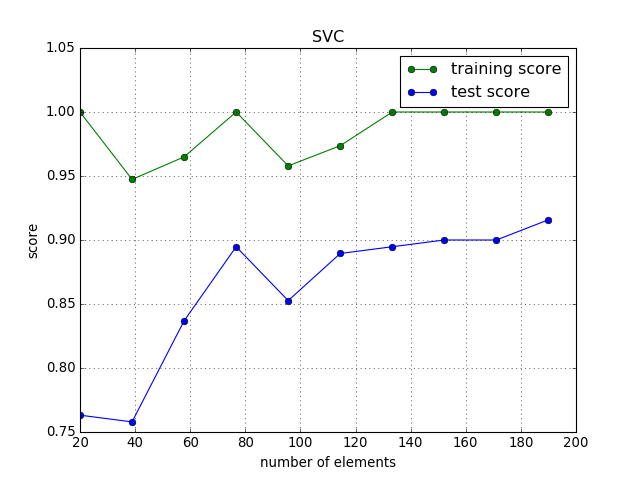

In [27]:
####################################################################
scores_training = []
scores_test = []
N = np.linspace(20,X_train.shape[0],10)
for n in N:
    n = np.int(n)
    # Quantitative evaluation of the model quality on the test set
    print "\n* Fitting the classifier to the training set with ",n," elements"
    t0 = time()
    #clf = SVC(kernel='linear', C=1.0)
    #clf = clf.fit(X_train, y_train)
    param_grid = {'C': np.logspace(-6,3,16)} # search from 10^-6 to 10^3
    clf_svc_grid = grid_search.GridSearchCV(SVC(kernel='linear'), param_grid,cv=5)
    clf_svc_grid.fit(X_train[:n,:],y_train[:n])
    param_best = clf_svc_grid.best_params_['C']
    scores = [x[1] for x in clf_svc_grid.grid_scores_]
    errors = 1 - np.asarray(scores)
    #print "*** regularization parameter list : ",clf_svc_grid.param_grid['C']
    #print "*** corresponding errors : ",errors
    print "*** best regularization parameter : ",param_best
    #print "*** done in %0.3fs" % (time() - t0)

    scores_training.append(clf_svc_grid.best_estimator_.score(X_train[:n,:],y_train[:n]))
    scores_test.append(clf_svc_grid.best_estimator_.score(X_test,y_test))

fig = pl.figure()
pl.grid()
pl.plot(N, scores_training, 'o-', color="g",label="training score")
pl.plot(N, scores_test, 'o-', color="b",label="test score")
pl.legend(loc="best")
pl.xlabel('number of elements')
pl.ylabel('score')
pl.legend()
pl.title('SVC')
pl.show()

In [244]:
print "Les scores de training et de test ne convergent pas vers la même limite" 
print "(",scores_training[-1],"!=",scores_test[-1],"), la SVM lineaire pénalisée n'est donc pas consistante"
print "pour la distribution de données étudiée"

Les scores de training et de test ne convergent pas vers la même limite
( 0.989473684211 != 0.915789473684 ), la SVM lineaire pénalisée n'est donc pas consistante
pour la distribution de données étudiée


## Question 10

### Fonctionelle primale et duale en fonction de la tolérance

fonctionnelle primale =  0.0420552236625
fonctionnelle duale = :  0.0355480826158


<IPython.core.display.Javascript object>


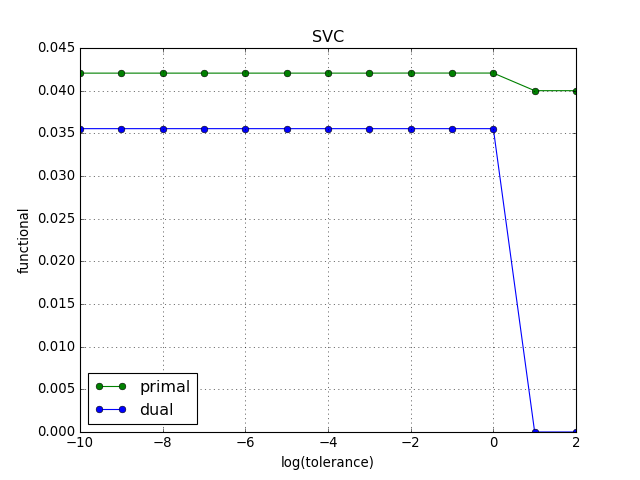

In [45]:
from sklearn.svm import LinearSVC

# we create 40 separable points
np.random.seed(0)
N = 20
Xd = np.r_[np.random.randn(N, 2) - [2, 2], np.random.randn(N, 2) + [2, 2]]
Yd = [0] * N + [1] * N
Yd = np.asarray(Yd)
C = 0.001

# fit the primal model
clf_primal = LinearSVC(C=C,dual=False)
clf_primal.fit(Xd, Yd)

# fit the dual model
clf_dual = SVC(C=C)
clf_dual.fit(Xd, Yd)

# get dual coefs and support vectors
Xs = clf_dual.support_vectors_
Ys = Yd[clf_dual.support_]
Ys[Ys==0]=-1 # be sure that labels are -1,1
alpha = clf_dual.dual_coef_[0]/Ys # dual_coef_ <=> y_i*alpha_i

# get primal coefficients and hinge loss
w = clf_primal.coef_[0]
w0 = clf_primal.intercept_[0]
loss = 1-Yd*(w0+np.dot(Xd,w))
loss[loss<0]=0

# compute primal and dual functionals
primal = 0.5*(np.linalg.norm(w)**2)+C*np.sum(loss)
dual = np.sum(alpha)-0.5*np.sum(np.dot((Ys*alpha*Xs.T).T,Ys*alpha*Xs.T))
print "fonctionnelle primale = ",primal
print "fonctionnelle duale = : ",dual

# same process for different tolerance values
primal = []
dual = []
tol_list = np.logspace(-10,2,13)

for tol in tol_list:
        
    # fit the primal model
    clf_primal = LinearSVC(C=C,dual=False,tol=tol)
    clf_primal.fit(Xd, Yd)

    # fit the dual model
    clf_dual = SVC(C=C,tol=tol)
    clf_dual.fit(Xd, Yd)

    # get dual coefs and support vectors
    Xs = clf_dual.support_vectors_
    Ys = Yd[clf_dual.support_]
    Ys[Ys==0]=-1 # be sure that labels are -1,1
    alpha = clf_dual.dual_coef_[0]/Ys # dual_coef_ <=> y_i*alpha_i

    # get primal coefficients and hinge loss
    w = clf_primal.coef_[0]
    w0 = clf_primal.intercept_[0]
    loss = 1-Yd*(w0+np.dot(Xd,w))
    loss[loss<0]=0


    # compute primal and dual functionals
    primal_i = 0.5*(np.linalg.norm(w)**2)+C*np.sum(loss)
    dual_i = np.sum(alpha)-0.5*np.sum(np.dot((Ys*alpha*Xs.T).T,Ys*alpha*Xs.T))
    
    primal.append(primal_i)
    dual.append(dual_i)
    
fig = pl.figure()
pl.grid()
pl.plot(np.log10(tol_list), primal, 'o-', color="g",label="primal")
pl.plot(np.log10(tol_list), dual, 'o-', color="b",label="dual")
pl.legend(loc="best")
pl.xlabel('log(tolerance)')
pl.ylabel('functional')
pl.legend(loc=3)
pl.title('SVC')
pl.show()  

Les valeurs de fonctionnelle primale et duale restent proches pour des tolerances faibles.
Sauf à partir d'une tolérance de 1 : la fonctionelle duale diminue considérablement alors que la primale reste au même niveau.

## Question 11

In [88]:
path = "drug_activity"

# Load the data
K = np.loadtxt(path + "/ncicancer_kernel_hf_ex0.txt") # Load the kernel
y = np.loadtxt(path + "/ncicancer_targets_ex0.txt")[:, 0] # Load the targets
y = (y-np.min(y)) / (np.max(y)-np.min(y)) # Scale the targets
# Split train/test sets
indices = np.random.permutation(K.shape[0])
train_idx, test_idx = indices[:K.shape[0]/2], indices[K.shape[0]/2:]
K_train = K[train_idx][:,train_idx]
y_train = y[train_idx]
K_test = K[test_idx][:,train_idx]
y_test = y[test_idx]

In [94]:
from sklearn.svm import SVR

# recherche de la meilleure svr non lineaire gaussienne en cherchant C et gamma par cross-validation
C_range = np.logspace(-4,2,7) # de 1e-4 à 1e2
epsilon_range = np.logspace(-5,0,6) # de 1e-5 à 1
param_grid = dict(epsilon=epsilon_range,C=C_range)
# instanciation d'un grid_search pour trouver le meilleur jeu d'hyperparamètres pour un SVR 
grid = grid_search.GridSearchCV(SVR(kernel='precomputed'), param_grid=param_grid, cv=5)
grid.fit(K_train,y_train)
print("Les meilleurs paramètres sont %s avec un score de %0.2f"
      % (grid.best_params_, grid.best_score_))
print "score de test avec la meilleure SVR : ",grid.best_estimator_.score(K_test,y_test)


Les meilleurs paramètres sont {'epsilon': 0.01, 'C': 1.0} avec un score de 0.35
score de test avec la meilleure SVR :  0.347096290229


In [97]:
from sklearn.linear_model import Ridge

# recherche de la meilleure regression pénalisé par cross-validation
alpha_range = np.logspace(-5,5,11) # de 1e-5 à 1e5
param_grid = dict(alpha=alpha_range)
# instanciation d'un grid_search pour trouver le meilleur alpha (coefficient de penalité)
grid = grid_search.GridSearchCV(Ridge(), param_grid=param_grid, cv=5)
grid.fit(K_train,y_train)
print("Les meilleurs paramètres sont %s avec un score de %0.2f"
      % (grid.best_params_, grid.best_score_))
print "score de test avec la meilleure regression penalisée : ",grid.best_estimator_.score(K_test,y_test)


Les meilleurs paramètres sont {'alpha': 1.0} avec un score de 0.34
score de test avec la meilleure regression penalisée :  0.344066388767
